In [1]:
# Import Numpy for calculations and matplotlib for charting
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
from scipy import stats

In [2]:
# Read our data file the pandas library
file_path = Path("../Resources/California_predictions_results.csv")
data = pd.read_csv(file_path)

file_path2 = Path("../Resources/proj_4_feat_target_var_set_update.csv")
data2 = pd.read_csv(file_path2)

# Display sample data

data2

,fips_code,state_id,state_name,high_tourist_border_sales,year,niaaa_pop_21_plus,census_total_pop,census_total_pop_21_plus,census_percent_pop_21_plus,census_percent_pop_18_24,...,bea_personal_income_dollars,bea_disp_inc_dollars,bea_percapita_personal_income_dollars,bea_percapita_disp_inc_dollars,census_median_household_inc_dollars,census_percent_pop_in_poverty_est,niaaa_total_beer_vol_consumed_gallons,niaaa_legal_adult_per_capita_beer_consumed_gallons,ba_craft_beer_produced_gallons,ba_legal_adult_per_capita_craft_beer_produced_gallons
0,1,AL,Alabama,0,2010,3439923,4785298,3426273,0.716,0.102,...,162068.8,148862.1,33849,31091,40474,0.172,101835000,29.60,NaN,NaN
1,2,AK,Alaska,1,2010,494781,713985,494078,0.692,0.105,...,35374.3,32703.9,49543,45803,64576,0.125,15476350,31.28,NaN,NaN
2,4,AZ,Arizona,0,2010,4496526,6413737,4502443,0.702,0.099,...,216223.6,198815.2,33774,31055,46789,0.188,140015325,31.14,NaN,NaN
3,5,AR,Arkansas,0,2010,2082760,2921606,2074340,0.710,0.100,...,94127.0,86387.0,32218,29569,38307,0.153,53429000,25.65,NaN,NaN
4,6,CA,California,0,2010,26311028,37349363,26293952,0.704,0.106,...,1609997.5,1431825.6,43138,38364,57708,0.163,651673303,24.77,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,51,VA,Virginia,0,2021,6412892,8642274,6395283,0.740,0.095,...,578639.7,499639.6,66838,57713,80963,0.098,151097751,23.56,14074350.0,2.19
608,53,WA,Washington,0,2021,5795889,7738692,5788542,0.748,0.086,...,574266.8,505590.1,74188,65315,84247,0.077,125364000,21.63,17599728.0,3.04
609,54,WV,West Virginia,0,2021,1358876,1782959,1351483,0.758,0.088,...,87617.4,79840.2,49071,44715,51248,0.169,38037000,27.99,733894.0,0.54
610,55,WI,Wisconsin,0,2021,4383656,5895908,4380660,0.743,0.092,...,355048.0,314662.1,60381,53513,67125,0.093,135005000,30.80,30531485.0,6.96


In [3]:
fips = 6
condition = data2['fips_code'] == fips
data2 = data2[condition]
data2

,fips_code,state_id,state_name,high_tourist_border_sales,year,niaaa_pop_21_plus,census_total_pop,census_total_pop_21_plus,census_percent_pop_21_plus,census_percent_pop_18_24,...,bea_personal_income_dollars,bea_disp_inc_dollars,bea_percapita_personal_income_dollars,bea_percapita_disp_inc_dollars,census_median_household_inc_dollars,census_percent_pop_in_poverty_est,niaaa_total_beer_vol_consumed_gallons,niaaa_legal_adult_per_capita_beer_consumed_gallons,ba_craft_beer_produced_gallons,ba_legal_adult_per_capita_craft_beer_produced_gallons
4,6,CA,California,0,2010,26311028,37349363,26293952,0.7040,0.1060,...,1609997.5,1431825.6,43138,38364,57708,0.163,651673303,24.77,NaN,NaN
55,6,CA,California,0,2011,26698281,37691912,26685874,0.7080,0.1060,...,1713428.0,1504645.4,45509,39963,57287,0.169,643901979,24.12,62627626.0,2.35
106,6,CA,California,0,2012,27093829,38041430,27085498,0.7120,0.1060,...,1814763.0,1590509.7,47794,41888,58328,0.159,676306044,24.96,76067583.0,2.81
157,6,CA,California,0,2013,27467761,38332521,27446085,0.7160,0.1050,...,1840885.3,1587112.7,48076,41448,60190,0.149,680648643,24.78,91415740.0,3.33
208,6,CA,California,0,2014,27843765,38802500,27976603,0.7210,0.1030,...,1955718.0,1679406.9,50619,43467,61933,0.158,699849640,25.13,106116840.0,3.81
259,6,CA,California,0,2015,28200824,39144818,28379993,0.7250,0.1010,...,2097049.6,1786764.4,53817,45854,64500,0.139,705526842,25.02,117793335.0,4.18
310,6,CA,California,0,2016,28500684,39250017,28534762,0.7270,0.0980,...,2191138.0,1871763.1,55863,47721,67739,0.139,687240437,24.11,102151866.0,3.58
361,6,CA,California,0,2017,28745762,39536653,28861757,0.7300,0.0960,...,2295048.7,1961488.7,58214,49754,71805,0.124,679722660,23.65,101851274.0,3.54
412,6,CA,California,0,2018,28923058,39557045,28955757,0.7320,0.0950,...,2411055.1,2057748.6,60984,52048,75277,0.119,743101000,25.69,107793720.0,3.73
463,6,CA,California,0,2019,29023260,39512223,29041484,0.7350,0.0930,...,2537950.6,2169277.3,64174,54852,80440,0.101,759376000,26.16,117350416.0,4.04


In [4]:
sample_data = data['Predicted_Value']

# Calculate sample statistics
sample_mean = sample_data.mean()
sample_std = sample_data.std()
sample_size = len(sample_data)

# Choose confidence level
confidence_level = 0.95

# Calculate critical value
critical_value = stats.t.ppf((1 + confidence_level) / 2, df=sample_size - 1)

# Calulate standard error
standard_error = sample_std / (sample_size ** 0.5)

# Calculate margin of error
margin_of_error = critical_value * standard_error

# Calculate lower and upper bounds
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

# Add lower and upper bounds to a new column in the DataFrame

data['Lower Bound'] = lower_bound
data['Upper Bound'] = upper_bound

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
data.head()

Lower Bound: 25.364643660375677
Upper Bound: 25.61307041557987


,Percentage,Predicted_Value,Lower Bound,Upper Bound
0,0.01,25.151434,25.364644,25.61307
1,0.02,25.151434,25.364644,25.61307
2,0.03,25.151434,25.364644,25.61307
3,0.04,25.151434,25.364644,25.61307
4,0.05,25.256412,25.364644,25.61307


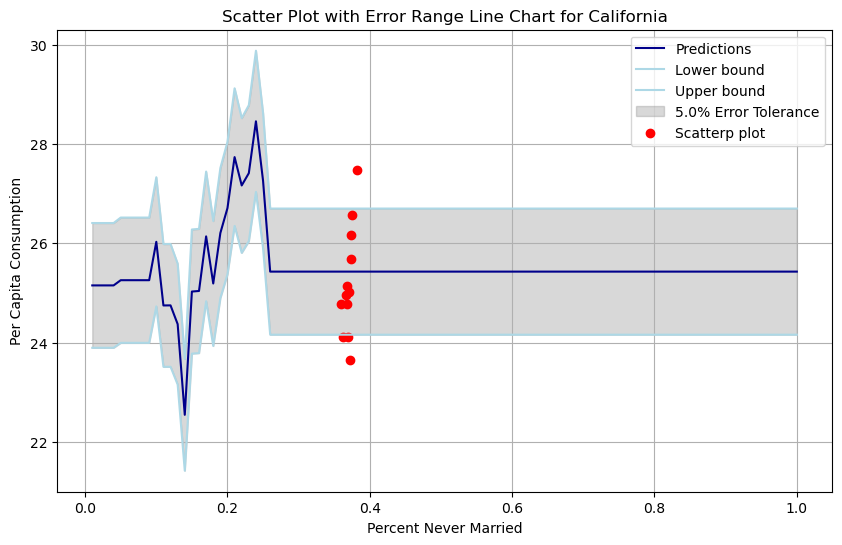

In [5]:
# Extract columns for X-axis, Y-axis, and error range bounds
x_values = data['Percentage']  # Replace 'X-axis' with the actual column name for X-axis data
y_values = data['Predicted_Value']  # Replace 'Y-axis' with the actual column name for Y-axis data

tolerance = 0.05
lowerY = data['Predicted_Value'] * (1 - tolerance)
upperY = data['Predicted_Value'] * (1 + tolerance)

# Plot the error range with the line graph
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='Predictions', color = 'darkblue')
plt.plot(x_values, lowerY, label='Lower bound', color = 'lightblue')
plt.plot(x_values, upperY, label='Upper bound', color = 'lightblue')
plt.fill_between(x_values, lowerY, upperY, color='gray', alpha=0.3, label=f'{tolerance*100}% Error Tolerance')

scatterX = data2['census_percent_pop_never_married']
scatterY = data2['niaaa_legal_adult_per_capita_beer_consumed_gallons']

plt.scatter(scatterX, scatterY, label='Scatterp plot', color='red')

# Customize labels and title
plt.xlabel('Percent Never Married')
plt.ylabel('Per Capita Consumption')
plt.title('Scatter Plot with Error Range Line Chart for California')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()